In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pylab 
import sklearn

In [2]:
df=pd.read_csv('titanic.csv')

In [3]:
df.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0


In [4]:
df.isnull().sum()

passenger_id      0
pclass            0
name              0
sex               0
age             174
sibsp             0
parch             0
ticket            0
fare              1
cabin           659
embarked          1
boat            542
body            777
home.dest       386
survived          0
dtype: int64

In [5]:
df.isnull()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,False,False,False,False,True,False,False,False,False,True,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,True,False,True,True,False,False
2,False,False,False,False,False,False,False,False,False,True,False,True,True,True,False
3,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,True,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
846,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
847,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False
848,False,False,False,False,False,False,False,False,False,True,False,True,True,True,False


In [6]:
df.isnull().mean()

passenger_id    0.000000
pclass          0.000000
name            0.000000
sex             0.000000
age             0.204706
sibsp           0.000000
parch           0.000000
ticket          0.000000
fare            0.001176
cabin           0.775294
embarked        0.001176
boat            0.637647
body            0.914118
home.dest       0.454118
survived        0.000000
dtype: float64

In [7]:
df.shape

(850, 15)

In [8]:
df['cabin'].unique()

array([nan, 'C82', 'D15', 'C50', 'E33', 'B57 B59 B63 B66', 'E34', 'C83',
       'C125', 'B82 B84', 'B96 B98', 'B51 B53 B55', 'C132', 'C31', 'C68',
       'B94', 'F E46', 'C126', 'D34', 'B28', 'C65', 'B52 B54 B56', 'D17',
       'C86', 'C7', 'E25', 'E17', 'D56', 'A9', 'B26', 'C91', 'B5', 'D',
       'A23', 'C22 C26', 'C124', 'E63', 'B35', 'B18', 'C6', 'B49', 'B19',
       'G6', 'D35', 'C23 C25 C27', 'C62 C64', 'B73', 'E12', 'B41', 'A20',
       'B69', 'C78', 'A14', 'D26', 'C51', 'B79', 'E52', 'C49', 'C104',
       'B61', 'D43', 'D48', 'C123', 'A7', 'D47', 'D49', 'B80', 'A29',
       'F38', 'B58 B60', 'A34', 'D33', 'D20', 'F G63', 'T', 'A6',
       'C55 C57', 'B38', 'E49', 'F4', 'E121', 'C85', 'C87', 'B86', 'B102',
       'C111', 'D22', 'B22', 'B77', 'B50', 'B30', 'E36', 'F33', 'E60',
       'B39', 'C118', 'D21', 'F2', 'E39 E41', 'E101', 'A32', 'D38',
       'C101', 'C54', 'C106', 'C32', 'D36', 'E50', 'D40', 'C30', 'C52',
       'C130', 'C80', 'F G73', 'E10', 'B10', 'B24', 'C2', 'D28', '

In [9]:
df['cabin_nan']=np.where(df['cabin'].isnull(),1,0)

In [10]:
df['cabin_nan'].head()

0    1
1    1
2    1
3    1
4    1
Name: cabin_nan, dtype: int32

In [11]:
df['cabin_nan'].mean() ##find out the % of null values

0.7752941176470588

In [12]:
## compare the 'cabin' with 'survived ' column
df.groupby(['survived'])['cabin_nan']

In [13]:
## compare the 'cabin' with 'survived ' column
df.groupby(['survived'])['cabin_nan'].mean()

survived
0    0.880819
1    0.594249
Name: cabin_nan, dtype: float64

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cabin_nan', ylabel='count'>

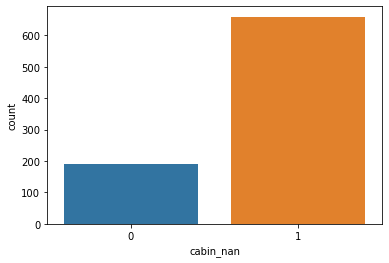

In [14]:
sns.countplot(df['cabin_nan'])

<AxesSubplot:xlabel='cabin_nan', ylabel='Density'>

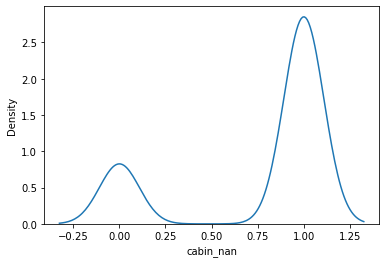

In [15]:
sns.kdeplot(df['cabin_nan'])

In [16]:
df=df.drop(columns='cabin',axis=1)

In [17]:
df['embarked'].value_counts()

S    589
C    176
Q     84
Name: embarked, dtype: int64

In [18]:
df['embarked'].mode()

0    S
dtype: object

In [19]:
df['embarked'].fillna(df['embarked'].mode()[0],inplace=True)

In [20]:
df.isnull().sum()

passenger_id      0
pclass            0
name              0
sex               0
age             174
sibsp             0
parch             0
ticket            0
fare              1
embarked          0
boat            542
body            777
home.dest       386
survived          0
cabin_nan         0
dtype: int64

In [21]:
df.age.mean()

29.519847189349115

<AxesSubplot:>

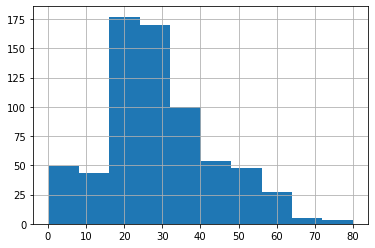

In [22]:
df.age.hist()

In [23]:
df['age'].fillna(df['age'].mean())

0      29.519847
1      38.000000
2      30.000000
3      54.000000
4      40.000000
         ...    
845    55.000000
846    58.000000
847    24.000000
848     3.000000
849    52.000000
Name: age, Length: 850, dtype: float64

<AxesSubplot:>

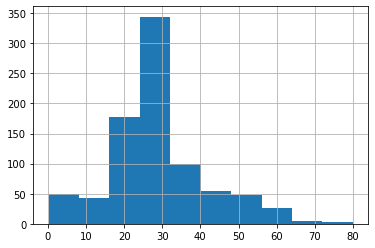

In [24]:
df['age'].fillna(df['age'].mean()).hist()

## Random Sample Imputation

In [25]:
df['age'].dropna().sample(df['age'].isnull().sum())

829     4.0
722    18.0
838    36.0
116    22.0
204    10.0
       ... 
583    22.0
444    54.0
465    27.0
691    18.0
123    36.0
Name: age, Length: 174, dtype: float64

In [26]:
df['age'].fillna(df['age'].dropna().sample(df['age'].isnull().sum()))

0       NaN
1      38.0
2      30.0
3      54.0
4      40.0
       ... 
845    55.0
846    58.0
847    24.0
848     3.0
849    52.0
Name: age, Length: 850, dtype: float64

In [27]:
df.isnull().sum()

passenger_id      0
pclass            0
name              0
sex               0
age             174
sibsp             0
parch             0
ticket            0
fare              1
embarked          0
boat            542
body            777
home.dest       386
survived          0
cabin_nan         0
dtype: int64

<AxesSubplot:>

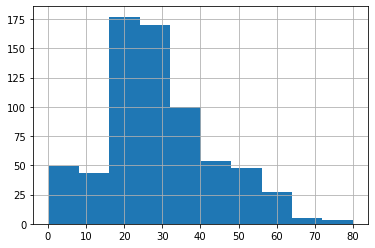

In [28]:
df.age.hist()

In [29]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    random_sample=df[variable]

In [30]:
random_sample=df.age.dropna().sample(df['age'].isnull().sum(),random_state=0)

In [31]:
random_sample.index=df[df.age.isnull()].index

In [32]:
df.loc[df.age.isnull()]

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,boat,body,home.dest,survived,cabin_nan
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,Q,13,NaN,NaN,1,1
17,1003,3,"McCoy, Mr. Bernard",male,NaN,2,0,367226,23.2500,Q,16,NaN,NaN,1,1
21,1030,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q,NaN,NaN,NaN,0,1
28,775,3,"Doharr, Mr. Tannous",male,NaN,0,0,2686,7.2292,C,NaN,NaN,NaN,0,1
30,15,1,"Baumann, Mr. John D",male,NaN,0,0,PC 17318,25.9250,S,NaN,NaN,"New York, NY",0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
814,1095,3,"O'Sullivan, Miss. Bridget Mary",female,NaN,0,0,330909,7.6292,Q,NaN,NaN,NaN,0,1
820,1167,3,"Sadlier, Mr. Matthew",male,NaN,0,0,367655,7.7292,Q,NaN,NaN,NaN,0,1
821,1123,3,"Peter, Mrs. Catherine (Catherine Rizk)",female,NaN,0,2,2668,22.3583,C,D,NaN,NaN,1,1
828,1245,3,"Thomson, Mr. Alexander Morrison",male,NaN,0,0,32302,8.0500,S,NaN,NaN,NaN,0,1


In [33]:
df.isnull().sum()

passenger_id      0
pclass            0
name              0
sex               0
age             174
sibsp             0
parch             0
ticket            0
fare              1
embarked          0
boat            542
body            777
home.dest       386
survived          0
cabin_nan         0
dtype: int64

In [34]:
df.age.fillna(df.age.mean(),inplace=True)

In [35]:
df.isnull().sum()

passenger_id      0
pclass            0
name              0
sex               0
age               0
sibsp             0
parch             0
ticket            0
fare              1
embarked          0
boat            542
body            777
home.dest       386
survived          0
cabin_nan         0
dtype: int64

In [36]:
df=pd.read_csv('titanic.csv',usecols=['age','fare','survived'])

In [37]:
df.head()

,age,fare,survived
0,NaN,7.7333,1
1,38.0,8.6625,0
2,30.0,24.1500,0
3,54.0,23.0000,1
4,40.0,13.0000,0


<AxesSubplot:>

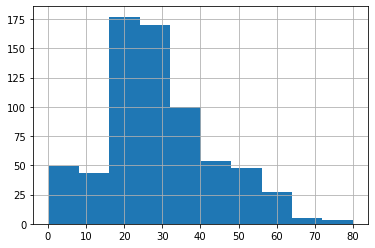

In [38]:
df.age.hist()

In [39]:
## End of distribution

extreme=df.age.mean()+3*df.age.std()
extreme

73.20657749172571

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

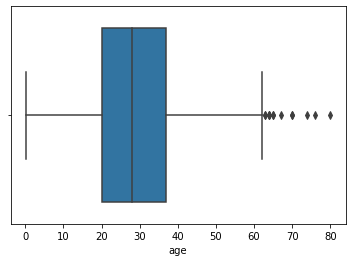

In [40]:
sns.boxplot('age',data=df)

In [41]:
def impute_nan(df,var,median,extreme):
    df[var+"-end_distribution"]=df[var].fillna(extreme)
    df[var].fillna(median,inplace=True)


In [42]:
df.age.median()

28.0

In [43]:
df.age.dtype

dtype('float64')

In [44]:
impute_nan(df,'age',df.age.median(),extreme)

In [45]:
extreme

73.20657749172571

In [46]:
df.age.isnull().sum()

0

In [47]:
df.head()

,age,fare,survived,age-end_distribution
0,28.0,7.7333,1,73.206577
1,38.0,8.6625,0,38.000000
2,30.0,24.1500,0,30.000000
3,54.0,23.0000,1,54.000000
4,40.0,13.0000,0,40.000000


In [48]:
df.isnull().sum()

age                     0
fare                    1
survived                0
age-end_distribution    0
dtype: int64

In [49]:
impute_nan(df,'fare',df.fare.median(),extreme)

In [50]:
df.isnull().sum()

age                      0
fare                     0
survived                 0
age-end_distribution     0
fare-end_distribution    0
dtype: int64

In [51]:
## Handel categorical variable- encoding

df1=pd.read_csv('titanic.csv',usecols=['sex'])

In [52]:
## one hot encoding
pd.get_dummies(df1).head()
	sex_female	sex_male
0	1	0
1	0	1
2	1	0
3	1	0
4	0	1

IndentationError: unexpected indent (<ipython-input-52-462ff3c2dc9a>, line 3)

In [53]:
df.head()

,age,fare,survived,age-end_distribution,fare-end_distribution
0,28.0,7.7333,1,73.206577,7.7333
1,38.0,8.6625,0,38.000000,8.6625
2,30.0,24.1500,0,30.000000,24.1500
3,54.0,23.0000,1,54.000000,23.0000
4,40.0,13.0000,0,40.000000,13.0000


In [54]:
df1.head()

,sex
0,female
1,male
2,female
3,female
4,male


In [55]:
## label encoding


from sklearn.preprocessing import LabelEncoder


In [56]:
encode=LabelEncoder() ## object odf class LabelEncoder

In [57]:
df2=pd.read_csv('titanic.csv')

In [58]:
df2.embarked.value_counts()

S    589
C    176
Q     84
Name: embarked, dtype: int64

In [59]:
df2.embarked.fillna(df2.embarked.mode()[0],inplace=True)

In [60]:
encode.fit_transform(df2.embarked)

array([1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 1, 2, 2, 2, 1,
       2, 2, 2, 2, 1, 2, 0, 2, 2, 1, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2,
       2, 2, 0, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 0,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 1,
       2, 2, 0, 2, 2, 2, 1, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2,
       0, 2, 0, 2, 1, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 1,
       0, 2, 2, 0, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 1,
       0, 2, 2, 1, 2, 0, 2, 1, 0, 2, 1, 0, 2, 2, 0, 2, 2, 0, 1, 0, 2, 0,
       0, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 0, 0, 2, 0, 2, 2, 2, 1, 0, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 1, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2,

In [61]:
sns.countplot('sex',hue='survived',data=df)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: Could not interpret input 'sex'

In [62]:
df.sex.value_counts()

AttributeError: 'DataFrame' object has no attribute 'sex'

In [63]:
df.head(5)

,age,fare,survived,age-end_distribution,fare-end_distribution
0,28.0,7.7333,1,73.206577,7.7333
1,38.0,8.6625,0,38.000000,8.6625
2,30.0,24.1500,0,30.000000,24.1500
3,54.0,23.0000,1,54.000000,23.0000
4,40.0,13.0000,0,40.000000,13.0000


In [64]:
sns.countplot('pclass',data=df)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: Could not interpret input 'pclass'

In [65]:
sns.countplot('pclass',hue='survived',data=df)

ValueError: Could not interpret input 'pclass'

In [66]:
df.replace({'sex':{'male':0,'female':1}},
           {'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)
